In [61]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [62]:
# Import the data

data_building_damage = pd.read_csv("D:/Ronit/Data Science/Projects/Clustering/Data/Data/csv_building_damage_assessment.csv")
#data_building_damage

c:\users\ronit\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (17,29,34,35,36,37,38,39,40,41,42,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
data_building_damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 79 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   building_id                                           762106 non-null  int64  
 1   district_id                                           762106 non-null  int64  
 2   vdcmun_id                                             762106 non-null  int64  
 3   ward_id                                               762106 non-null  int64  
 4   damage_overall_collapse                               500743 non-null  object 
 5   damage_overall_leaning                                500742 non-null  object 
 6   damage_overall_adjacent_building_risk                 500742 non-null  object 
 7   damage_foundation_severe                              254544 non-null  object 
 8   damage_foundation_moderate                  

# Missing data Visualisation

In [64]:
# Missing Values

d_missing = data_building_damage.isnull().sum()
d_missing.head(60)

building_id                                                  0
district_id                                                  0
vdcmun_id                                                    0
ward_id                                                      0
damage_overall_collapse                                 261363
damage_overall_leaning                                  261364
damage_overall_adjacent_building_risk                   261364
damage_foundation_severe                                507562
damage_foundation_moderate                              658500
damage_foundation_insignificant                         587204
damage_roof_severe                                      514801
damage_roof_moderate                                    614008
damage_roof_insignificant                               580399
damage_corner_separation_severe                         513607
damage_corner_separation_moderate                       568880
damage_corner_separation_insignificant                 

In [65]:
d_missing.tail(19)

has_damage_in_plane_failure                   545932
has_damage_out_of_plane_failure               521116
has_damage_out_of_plane_walls_ncfr_failure    503865
has_damage_gable_failure                      436819
has_damage_delamination_failure               475583
has_damage_column_failure                     732166
has_damage_beam_failure                       732868
has_damage_infill_partition_failure           740552
has_damage_staircase                          360368
has_damage_parapet                            310374
has_damage_cladding_glazing                   297105
has_geotechnical_risk                             12
has_geotechnical_risk_land_settlement              0
has_geotechnical_risk_fault_crack                  0
has_geotechnical_risk_liquefaction                 0
has_geotechnical_risk_landslide                    0
has_geotechnical_risk_rock_fall                    0
has_geotechnical_risk_flood                        0
has_geotechnical_risk_other                   

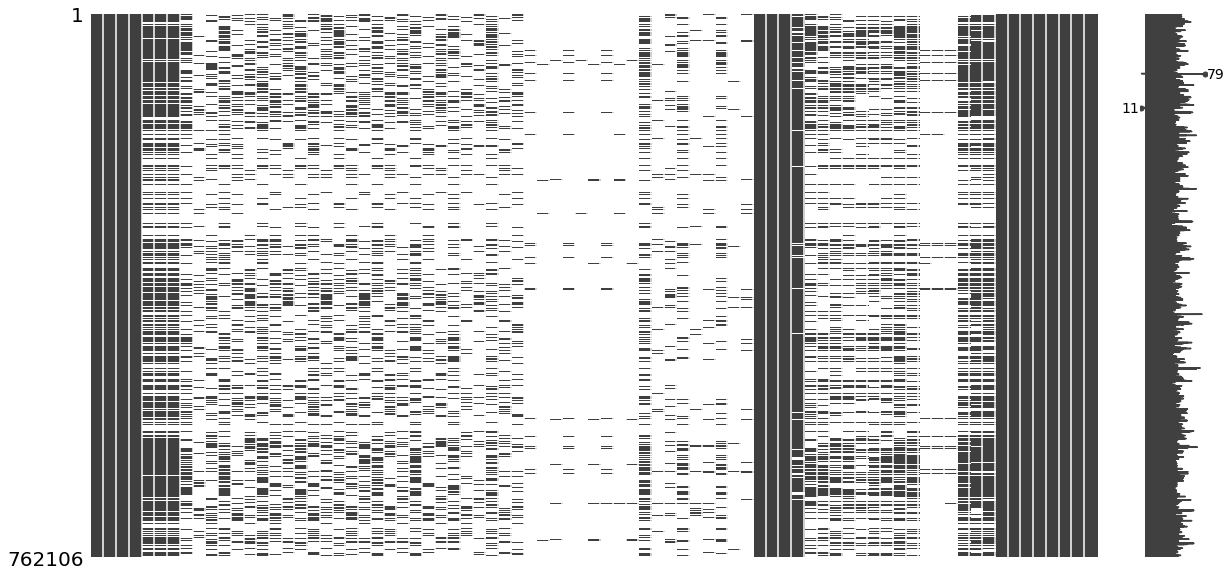

In [66]:
# Visualizing the missing data

missingno.matrix(data_building_damage, figsize = (20,10))

# Handling Missing data

In [67]:
# Dropping the columns from Index 7 to 69 as they contain more than 300k missing values

data_building_damage.drop(data_building_damage.iloc[:, 7:70], axis = 1, inplace = True)
data_building_damage.isnull().sum()

building_id                                   0
district_id                                   0
vdcmun_id                                     0
ward_id                                       0
damage_overall_collapse                  261363
damage_overall_leaning                   261364
damage_overall_adjacent_building_risk    261364
has_damage_cladding_glazing              297105
has_geotechnical_risk                        12
has_geotechnical_risk_land_settlement         0
has_geotechnical_risk_fault_crack             0
has_geotechnical_risk_liquefaction            0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_rock_fall               0
has_geotechnical_risk_flood                   0
has_geotechnical_risk_other                   0
dtype: int64

In [68]:
data_building_damage

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,0.0,0.0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Insignificant/light,None,None,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0
762102,366709001251,36,3603,360302,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0
762103,366709001261,36,3603,360302,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0
762104,366709001271,36,3603,360302,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0


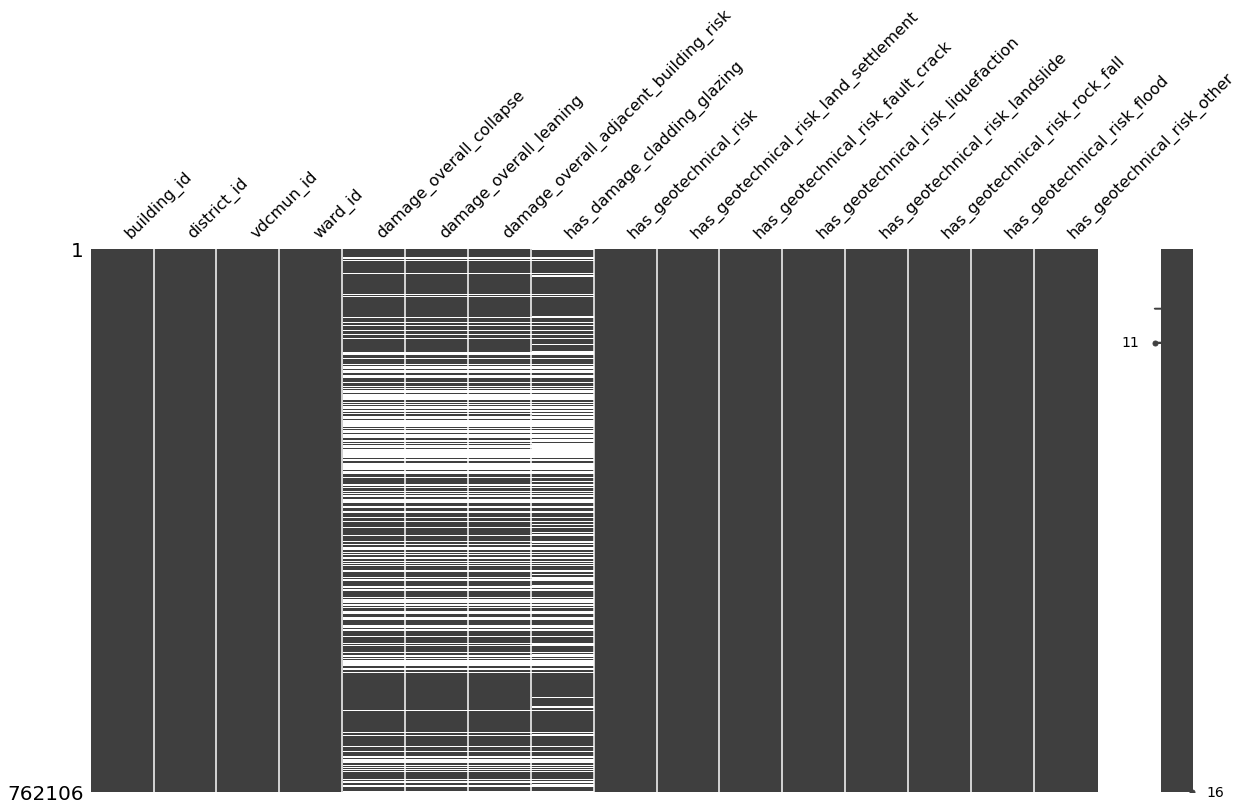

In [69]:
# Visualizing the missing data in the updated dataframe

missingno.matrix(data_building_damage, figsize = (20,10))

In [10]:
data_building_damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   building_id                            762106 non-null  int64  
 1   district_id                            762106 non-null  int64  
 2   vdcmun_id                              762106 non-null  int64  
 3   ward_id                                762106 non-null  int64  
 4   damage_overall_collapse                500743 non-null  object 
 5   damage_overall_leaning                 500742 non-null  object 
 6   damage_overall_adjacent_building_risk  500742 non-null  object 
 7   has_damage_cladding_glazing            465001 non-null  float64
 8   has_geotechnical_risk                  762094 non-null  float64
 9   has_geotechnical_risk_land_settlement  762106 non-null  int64  
 10  has_geotechnical_risk_fault_crack      762106 non-null  

# Quick EDA: Data Visualisation

In [71]:
data_building_damage["damage_overall_collapse"].value_counts()

Moderate-Heavy         205442
Severe-Extreme         115878
Insignificant/light    107614
None                    71809
Name: damage_overall_collapse, dtype: int64

In [72]:
data_building_damage["damage_overall_leaning"].value_counts()

None                   230126
Insignificant/light    154133
Moderate-Heavy          90306
Severe-Extreme          26177
Name: damage_overall_leaning, dtype: int64

In [15]:
data_building_damage["damage_overall_adjacent_building_risk"].value_counts()

None                   395215
Insignificant/light     53550
Moderate-Heavy          31562
Severe-Extreme          20415
Name: damage_overall_adjacent_building_risk, dtype: int64

In [16]:
data_building_damage["has_damage_cladding_glazing"].value_counts()

1.0    328650
0.0    136351
Name: has_damage_cladding_glazing, dtype: int64

In [17]:
data_building_damage["has_geotechnical_risk"].value_counts()

0.0    652447
1.0    109647
Name: has_geotechnical_risk, dtype: int64

In [18]:
data_building_damage["has_geotechnical_risk_land_settlement"].value_counts()

0    733055
1     29051
Name: has_geotechnical_risk_land_settlement, dtype: int64

In [19]:
data_building_damage["has_geotechnical_risk_fault_crack"].value_counts()

0    721558
1     40548
Name: has_geotechnical_risk_fault_crack, dtype: int64

In [20]:
data_building_damage["has_geotechnical_risk_liquefaction"].value_counts()

0    759976
1      2130
Name: has_geotechnical_risk_liquefaction, dtype: int64

In [21]:
data_building_damage["has_geotechnical_risk_landslide"].value_counts()

0    701032
1     61074
Name: has_geotechnical_risk_landslide, dtype: int64

In [22]:
data_building_damage["has_geotechnical_risk_rock_fall"].value_counts()

0    730113
1     31993
Name: has_geotechnical_risk_rock_fall, dtype: int64

In [23]:
data_building_damage["has_geotechnical_risk_flood"].value_counts()

0    753175
1      8931
Name: has_geotechnical_risk_flood, dtype: int64

In [24]:
data_building_damage["has_geotechnical_risk_other"].value_counts()

0    761291
1       815
Name: has_geotechnical_risk_other, dtype: int64

Text(0.5, 1.0, 'Building damage distribution')

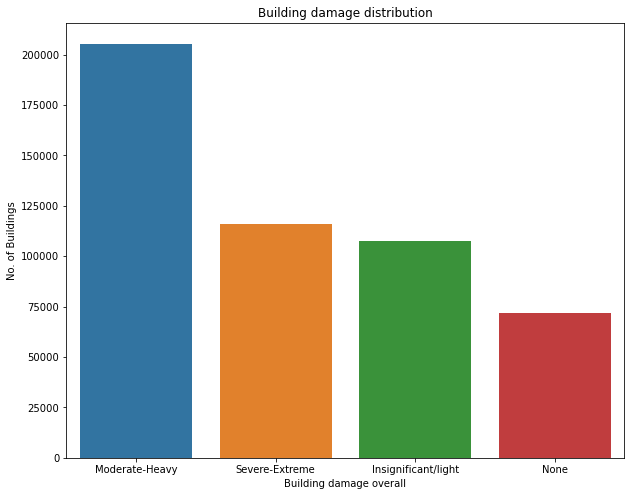

In [25]:
# Visualising the number of buildings with varying degress of damage

fig, ax = plt.subplots(figsize = (10,8))
ax = sns.countplot(x="damage_overall_collapse", data=data_building_damage)
ax.set_xlabel("Building damage overall", fontsize = 10)
ax.set_ylabel("No. of Buildings", fontsize = 10)
ax.set_title("Building damage distribution")

# Data Preprocessing

In [4]:
# Converting Ordinal Data into ranked numeric integers to apply kmeans properly
# Creating a dictionary to assign the varying degrees of damage a numeric rank
temp = {"None": 0, "Insignificant/light": 1, "Moderate-Heavy": 2, "Severe-Extreme": 3}

data_building_damage["damage_overall_collapse_new"]= data_building_damage.damage_overall_collapse.map(temp)
data_building_damage["damage_overall_leaning_new"]= data_building_damage.damage_overall_leaning.map(temp)
data_building_damage["damage_overall_adjacent_building_risk_new"]= data_building_damage.damage_overall_adjacent_building_risk.map(temp)
data_building_damage = data_building_damage.drop(["damage_overall_collapse"], axis = 1)
data_building_damage = data_building_damage.drop(["damage_overall_leaning"], axis = 1)
data_building_damage = data_building_damage.drop(["damage_overall_adjacent_building_risk"], axis = 1)
data_building_damage.head()

,building_id,district_id,vdcmun_id,ward_id,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,damage_overall_collapse_new,damage_overall_leaning_new,damage_overall_adjacent_building_risk_new
0,120101000011,12,1207,120703,0.0,0.0,0,0,0,0,0,0,0,2.0,1.0,0.0
1,120101000021,12,1207,120703,0.0,0.0,0,0,0,0,0,0,0,3.0,3.0,1.0
2,120101000031,12,1207,120703,0.0,0.0,0,0,0,0,0,0,0,2.0,2.0,2.0
3,120101000041,12,1207,120703,0.0,0.0,0,0,0,0,0,0,0,2.0,2.0,2.0
4,120101000051,12,1207,120703,0.0,0.0,0,0,0,0,0,0,0,1.0,0.0,0.0


In [5]:
#Scaling the data before applying kmeans

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
data_building_damage_scaled = scl.fit_transform(data_building_damage.iloc[:, 4:16]) 
data_building_damage_scaled = pd.DataFrame(data_building_damage_scaled)
data_building_damage_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
762101,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
762102,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
762103,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
762104,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [6]:
# Creating a new Dataframe with the scaled data

data_building_damage_scaled["building_id"] = data_building_damage["building_id"]
data_building_damage_scaled["district_id"] = data_building_damage["district_id"]
data_building_damage_scaled["vdcmun_id"] = data_building_damage["vdcmun_id"]
data_building_damage_scaled["ward_id"] = data_building_damage["ward_id"]
data_building_damage_scaled.columns = ["has_damage_cladding_glazing", "has_geotechnical_risk", "has_geotechnical_risk_land_settlement", "has_geotechnical_risk_fault_crack", "has_geotechnical_risk_liquefaction", "has_geotechnical_risk_landslide", "has_geotechnical_risk_rock_fall", "has_geotechnical_risk_flood", "has_geotechnical_risk_other", "damage_overall_collapse_new", "damage_overall_leaning_new", "damage_overall_adjacent_building_risk_new", "building_id", "district_id", "vdcmun_id", "ward_id"]
data_building_damage_scaled

,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,damage_overall_collapse_new,damage_overall_leaning_new,damage_overall_adjacent_building_risk_new,building_id,district_id,vdcmun_id,ward_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.000000,120101000011,12,1207,120703
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.333333,120101000021,12,1207,120703
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667,120101000031,12,1207,120703
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667,120101000041,12,1207,120703
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,120101000051,12,1207,120703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,366709001241,36,3603,360302
762102,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,366709001251,36,3603,360302
762103,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,366709001261,36,3603,360302
762104,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,366709001271,36,3603,360302


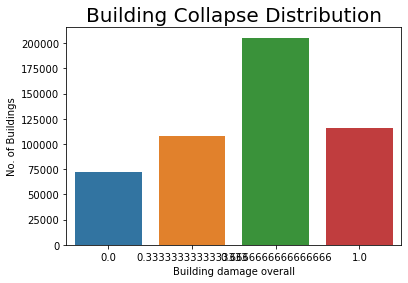

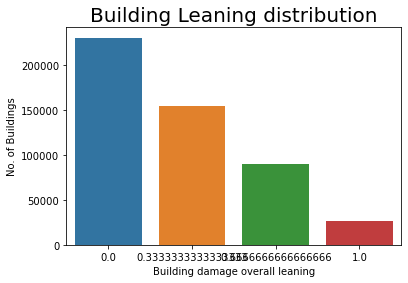

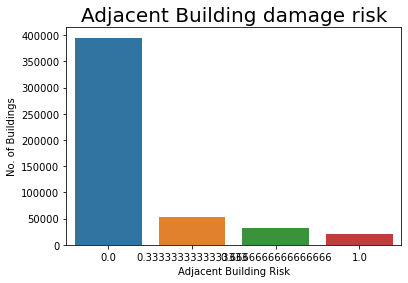

In [35]:
# Data Visualisation

fig, ax = plt.subplots()

ax = sns.countplot(x="damage_overall_collapse_new", data=data_building_damage_scaled)
ax.set_xlabel("Building damage overall", fontsize = 10)
ax.set_ylabel("No. of Buildings", fontsize = 10)
ax.set_title("Building Collapse Distribution", fontsize = 20)
plt.show()

ax = sns.countplot(x="damage_overall_leaning_new", data=data_building_damage_scaled)
ax.set_xlabel("Building damage overall leaning", fontsize = 10)
ax.set_ylabel("No. of Buildings", fontsize = 10)
ax.set_title("Building Leaning distribution", fontsize = 20)
plt.show()

ax = sns.countplot(x="damage_overall_adjacent_building_risk_new", data=data_building_damage_scaled)
ax.set_xlabel("Adjacent Building Risk", fontsize = 10)
ax.set_ylabel("No. of Buildings", fontsize = 10)
ax.set_title("Adjacent Building damage risk", fontsize = 20)
plt.show()

# Hopkins Statistics

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [10]:
data_building_damage_hopkins_set = data_building_damage_scaled.iloc[:, 0:12]

# Dropping all missing values to perform Hopkins analysis

df = data_building_damage_hopkins_set.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465001 entries, 0 to 762100
Data columns (total 12 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   has_damage_cladding_glazing                465001 non-null  float64
 1   has_geotechnical_risk                      465001 non-null  float64
 2   has_geotechnical_risk_land_settlement      465001 non-null  float64
 3   has_geotechnical_risk_fault_crack          465001 non-null  float64
 4   has_geotechnical_risk_liquefaction         465001 non-null  float64
 5   has_geotechnical_risk_landslide            465001 non-null  float64
 6   has_geotechnical_risk_rock_fall            465001 non-null  float64
 7   has_geotechnical_risk_flood                465001 non-null  float64
 8   has_geotechnical_risk_other                465001 non-null  float64
 9   damage_overall_collapse_new                465001 non-null  float64
 10  damage_o

In [78]:
hopkins(df)

0.9994157443231604

The Hopkins statistic tells us how good is the tendency to cluster a dataset.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.
If the value is around 0.5, it is random.
If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

<b>The Hopkins statistic for the current dataset is 0.999 indicating an excellent tendency to form clusters.<b/>

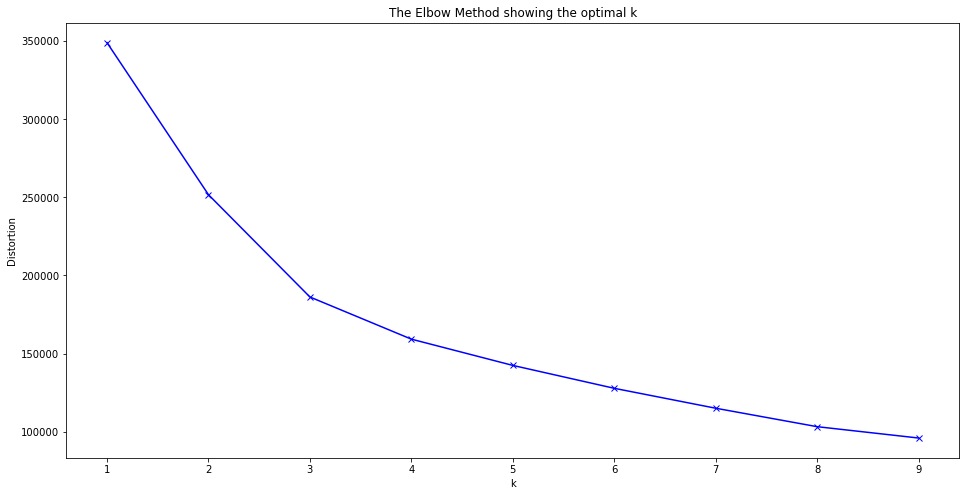

In [11]:
# Using the Elbow method to determine the number of optimal clusters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the curve, 5 is determined as the optimal number of clusters

# Applying KMeans Algorithm

In [12]:
# Fitting the data

kmeans = KMeans(n_clusters=5,random_state=0, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=5, random_state=0)

In [80]:
# Dropping all missing values to apply the clusters label correctly

df1 = data_building_damage_scaled.dropna()

# Adding Cluster IDs to the  data

df1["Cluster_ID"] = kmeans.labels_
df1.head()

<ipython-input-80-ba4a9eb1bd5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster_ID'] = kmeans.labels_


,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,damage_overall_collapse_new,damage_overall_leaning_new,damage_overall_adjacent_building_risk_new,building_id,district_id,vdcmun_id,ward_id,Cluster_ID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.000000,120101000011,12,1207,120703,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.333333,120101000021,12,1207,120703,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667,120101000031,12,1207,120703,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667,120101000041,12,1207,120703,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,120101000051,12,1207,120703,1


In [70]:
# Unique values of the Clusters

df1['Cluster_ID'].value_counts()

0    188625
1    122624
3     98505
2     32439
4     22808
Name: Cluster_ID, dtype: int64

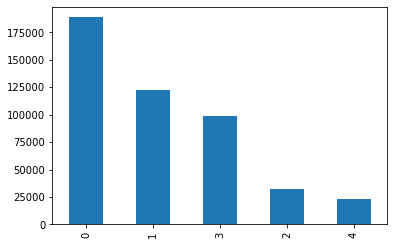

In [71]:
# Visualising the Clusters frequency

df1['Cluster_ID'].value_counts().plot(kind = 'bar')

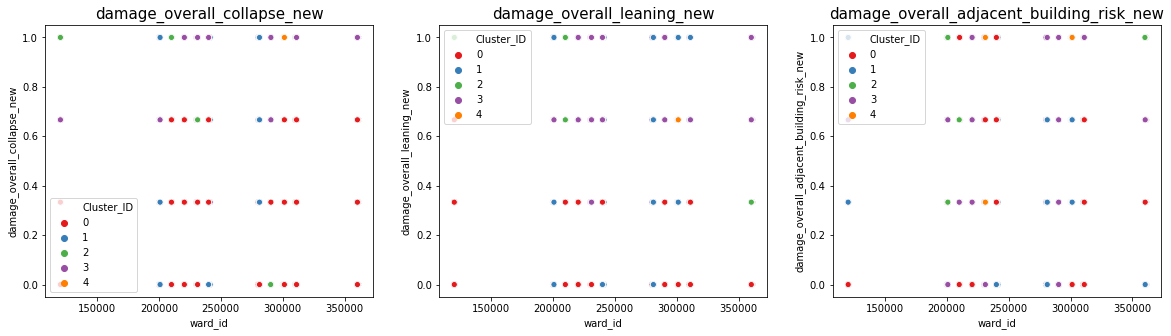

In [86]:
# Visualising the Clusters by Ward ID and damage types using Barplot

var=[ "damage_overall_collapse_new","damage_overall_leaning_new","damage_overall_adjacent_building_risk_new"]
fig= plt.figure(figsize = (20,5))

for i,col in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x =df1.ward_id, y = df1[col] ,hue='Cluster_ID',data = df1,legend='full', palette="Set1")
    plt.title(col,fontsize = 15)
    
plt.show()

We can determine with some difficulty that the Cluster 3 has been more adversely affected than others. It has the highest 
frequency in the Overall damage collapse, Overall Leaning and adjacent building risk categories.

Let's try some other way to confirm our assumption.

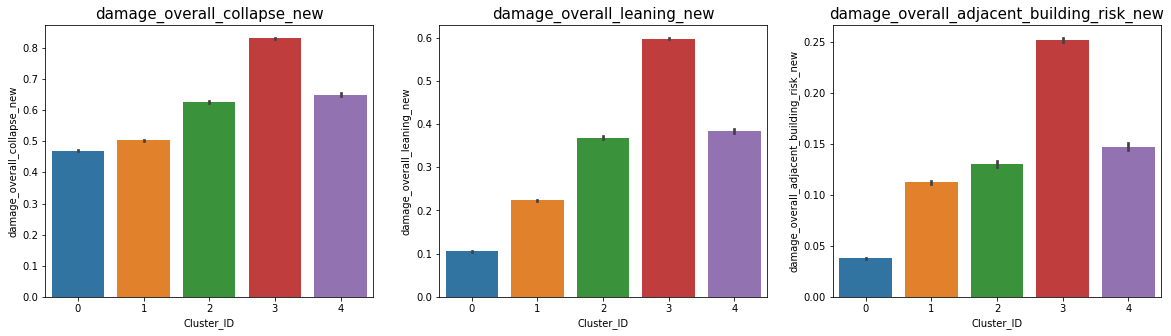

In [24]:
# Visualising the Clusters by Cluster ID and damage types using Barplot

var=[ "damage_overall_collapse_new","damage_overall_leaning_new","damage_overall_adjacent_building_risk_new"]
fig= plt.figure(figsize = (20,5))

for i,col in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.barplot(x=df1.Cluster_ID, y=df1[col])
    plt.title(col,fontsize = 15)
    
plt.show()

From the above figures we can confirm that the Cluster 3 has been adversely affected the most.

Lets see which wards we have in Cluster 3

In [77]:
wards_in_cluster_3 = df1[df1["Cluster_ID"].isin(["3"])]
wards_in_cluster_3["ward_id"]

61        120703
68        120703
69        120703
70        120703
72        120703
           ...  
761242    360301
761306    360301
761589    360302
761613    360302
761618    360302
Name: ward_id, Length: 98505, dtype: int64

The above list doesn't tells us clearly where the company needs to focus their efforts on. Lets import another dataset that contains the district names.

In [30]:
# Import the data

ward_district = pd.read_csv("D:/Ronit/Data Science/Projects/Clustering/Data/Data/ward_vdcmun_district_name_mapping.csv")
ward_district

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga
...,...,...,...,...,...
944,361104,3611,Siranchowk Rural Municipality,36,Gorkha
945,361105,3611,Siranchowk Rural Municipality,36,Gorkha
946,361106,3611,Siranchowk Rural Municipality,36,Gorkha
947,361107,3611,Siranchowk Rural Municipality,36,Gorkha


Merging the datasets on 'ward_id' and storing the data on a new dataframe

In [32]:
ward_district_data = df1.merge(ward_district, on="ward_id")
ward_district_data

,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,damage_overall_collapse_new,...,damage_overall_adjacent_building_risk_new,building_id,district_id_x,vdcmun_id_x,ward_id,Cluster_ID,vdcmun_id_y,vdcmun_name,district_id_y,district_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.000000,120101000011,12,1207,120703,1,1207,Siddhicharan Municipality,12,Okhaldhunga
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.333333,120101000021,12,1207,120703,1,1207,Siddhicharan Municipality,12,Okhaldhunga
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.666667,120101000031,12,1207,120703,1,1207,Siddhicharan Municipality,12,Okhaldhunga
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.666667,120101000041,12,1207,120703,1,1207,Siddhicharan Municipality,12,Okhaldhunga
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.000000,120101000051,12,1207,120703,1,1207,Siddhicharan Municipality,12,Okhaldhunga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,366705000451,36,3603,360301,0,3603,Barpak Sulikot Rural Municipality,36,Gorkha
464997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.000000,366705000671,36,3603,360301,0,3603,Barpak Sulikot Rural Municipality,36,Gorkha
464998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,366705000692,36,3603,360301,0,3603,Barpak Sulikot Rural Municipality,36,Gorkha
464999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,366705000701,36,3603,360301,1,3603,Barpak Sulikot Rural Municipality,36,Gorkha


In [39]:
# Analysing which ditricts come under the Cluster 3

cluster_3_districts = ward_district_data[ward_district_data["Cluster_ID"].isin(["3"])]
cluster_3_districts["district_name"].value_counts()

Kavrepalanchok    15908
Nuwakot           13967
Gorkha            13006
Dhading           12327
Sindhuli           9653
Ramechhap          9182
Makwanpur          7756
Dolakha            5617
Sindhupalchok      5582
Okhaldhunga        4387
Rasuwa             1120
Name: district_name, dtype: int64

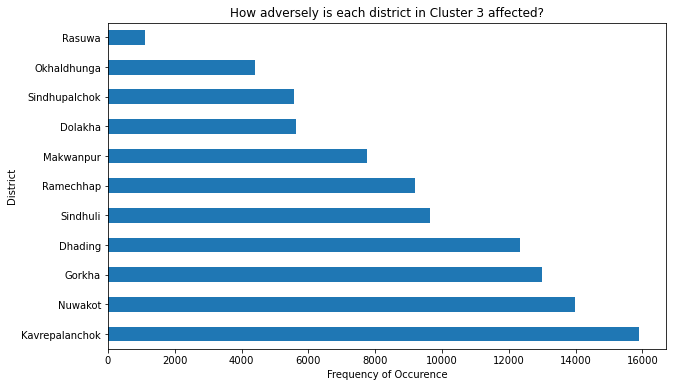

In [48]:
# Visualising which districts were the most adversely affected

cluster_3_districts["district_name"].value_counts().plot(kind="barh", figsize = (10,6), title = "How adversely is each district in Cluster 3 affected?")
plt.xlabel("Frequency of Occurence")
plt.ylabel("District")
plt.show()

# Conclusion

From our analysis, we have determined that the districts that need the most help are:
    <b>
    - Kavrepalanchok
    - Nuwakot
    - Gorkha 
    - Dhading
    - Sindhuli
    - Ramenchhap
    - Makwanpur
    - Dolakha
    - Sindhupalchok
    - Okhaldhunga
    - Rasuwa

# The End! :)
Made by: Ronit Choudhury
https://github.com/ronitch